In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from functools import reduce
from sklearn.mixture import GaussianMixture

#### Признаки в данных
- gradyear — год выпуска;
- gender — пол;
- age — возраст;
- friends — число друзей в социальной сети;
- basketball, football, soccer, softball, volleyball, swimming, cheerleading, baseball, tennis, sports, cute, sex, sexy, hot, kissed, dance, band, marching, music, rock, god, church, jesus, bible, hair, dress, blonde, mall, shopping, clothes, hollister, abercrombiedie, death, drunk, drugs (переменные с пятой по сороковую) — частота встречаемости соответствующих слов в сообщениях подростка.

In [2]:
df = pd.read_csv('./data/snsdata.csv')

### Задание 4.1
Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка. Удалите все остальные признаки. Какова размерность вашего текущего набора данных?

In [3]:
columns = ['gradyear', 'gender', 'age', 'friends']
X = df.drop(columns=columns)
print(f'Количество признаков: {X.shape[1]}\nКоличество наблюдений: {X.shape[0]}')

Количество признаков: 36
Количество наблюдений: 30000


### Задание 4.2
Теперь нормализуйте данные с помощью `StandardScaler()`. Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке `(X_norm[0][0])`
Ответ округлите до двух знаков после точки-разделителя.

In [4]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

print(f'X_norm[0][0] = {X_norm[0][0]:.2f}')

X_norm[0][0] = -0.33


### Задание 4.3
Реализуйте алгоритм `k-means` c `девятью кластерами`. В качестве значения параметра `random_state` возьмите число `42`. Выведите получившееся значение инерции `(model.inertia_)`. Ответ округлите до двух знаков после точки-разделителя.

In [5]:
kmeans = KMeans(n_clusters=9,random_state=42)
kmeans.fit(X_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [6]:
print(f' значение инерции {kmeans.inertia_:.2f}')

 значение инерции 857169.10


### Задание 4.4
Сколько подростков относится к наиболее многочисленному кластеру?
А сколько — к самому малочисленному?

In [7]:
_,counts = np.unique(kmeans.labels_, return_counts=True)
print(f'{counts.max()} подростков относится к наиболее многочисленному кластеру')
print(f'{counts.min()} подростков относится к самому малочисленному')

19659 подростков относится к наиболее многочисленному кластеру
1 подростков относится к самому малочисленному


### Задание 4.5
Мы выделили девять кластеров, но, возможно, это далеко не оптимальное количество. Давайте попробуем применить разные методы для нахождения числа кластеров. Будем выбирать количество кластеров из диапазона от 3 до 9.

In [8]:
%%time
clusters_num = range(3,10)
inertias = []
silhouettes = pd.Series()

for n_clusters in clusters_num:
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(X_norm)
    inertias.append(kmeans.inertia_)
    
#     silhouettes.append(silhouette_score(X_norm, kmeans.labels_))
    silhouettes = silhouettes.append(pd.Series(silhouette_score(X_norm, kmeans.labels_),
                                               index=[n_clusters]))

Wall time: 1min 17s


1. Для начала примените метод локтя. Каким в этом случае будет оптимальное число кластеров? Если оно не идентифицируется однозначно, запишите количество кластеров с наименьшей инерцией.

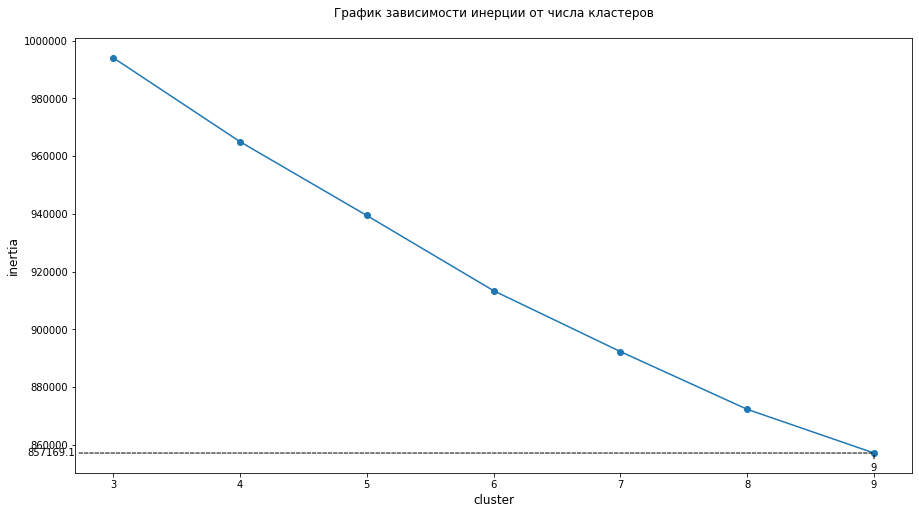

In [9]:
plt.figure(figsize=(15,8))
plt.title('График зависимости инерции от числа кластеров\n')
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
plt.plot(clusters_num,inertias,marker='o')

arrowprops={'arrowstyle': '-', 'ls':'--'}
plt.annotate(str(clusters_num[-1]), 
             xy=(clusters_num[-1],inertias[-1]), 
             xytext=(clusters_num[-1], 0), 
             textcoords=plt.gca().get_xaxis_transform(),
             arrowprops=arrowprops,
             va='bottom', 
             ha='center')
plt.annotate(str(round (inertias[-1],2) ),
             xy=(clusters_num[-1],inertias[-1]),
             xytext=(0, inertias[-1]),
             textcoords=plt.gca().get_yaxis_transform(),
             arrowprops=arrowprops, 
             va='center', 
             ha='right')
plt.show()

2. Теперь попробуйте подобрать оптимальное количество кластеров с помощью коэффициента силуэта. Каким оно будет?

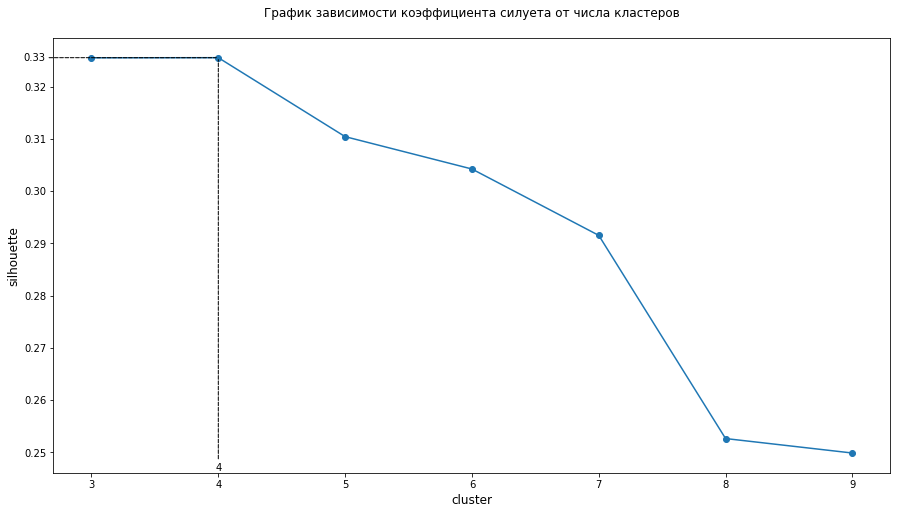

In [10]:
plt.figure(figsize=(15,8))
plt.title('График зависимости коэффициента силуета от числа кластеров\n')
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot(clusters_num,silhouettes,marker='o')

arrowprops={'arrowstyle': '-', 'ls':'--'}
plt.annotate(str(silhouettes.idxmax()), 
             xy=(silhouettes.idxmax(),silhouettes.max()), 
             xytext=(silhouettes.idxmax(), 0), 
             textcoords=plt.gca().get_xaxis_transform(),
             arrowprops=arrowprops,
             va='bottom', 
             ha='center')
plt.annotate(str(round(silhouettes.max(),2)),
             xy=(silhouettes.idxmax(),silhouettes.max()),
             xytext=(-0.01, silhouettes.max()),
             textcoords=plt.gca().get_yaxis_transform(),
             arrowprops=arrowprops, 
             va='center', 
             ha='right')
plt.show()

### Задание 4.6
Опираясь на коэффициент силуэта, реализуйте сегментацию подростков на выбранном количестве кластеров.

Отметьте ключевые слова, характерные для каждого из трёх выделенных кластеров:
- A music
- B dance
- C shopping
- D god
- E cute
- F hair
- G church
- H basketball
- I mall
- J football

In [11]:
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters,random_state=42)
kmeans.fit(X_norm)

word_freq = X.groupby(kmeans.labels_).mean()
clusters_tops = word_freq.apply(lambda x: set(x.sort_values().index[-10:]),axis=1)
common_words = reduce(lambda x,y: x & y, clusters_tops)
common_words

{'dance', 'god', 'hair', 'music'}

### Задание 4.7
Итак, с `k-means` мы потренировались — теперь перейдём к `EM-алгоритму`.

Реализуйте `EM-алгоритм` (`GaussianMixture`) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра `random_state` возьмите число `42`.

Сколько подростков алгоритм отнёс к самому многочисленному кластеру?

In [14]:
gm = GaussianMixture(n_components=3,random_state=42)
predictions = gm.fit_predict(X_norm)

labels,counts = np.unique(predictions,return_counts=True)
print(f'{counts.max()} подростков алгоритм отнёс к самому многочисленному кластеру')

23426 подростков алгоритм отнёс к самому многочисленному кластеру


### Задание 4.8
В одном из кластеров оказался всего один человек. Давайте узнаем, что это за подросток и чем он(а) интересуется.

Отметьте три слова, которые чаще всего встречаются в сообщениях этого подростка:

In [74]:
min_claster = labels[np.argmin(counts)]
ind = X.index[predictions==min_claster][0]
ind = np.where(predictions == min_claster)[0][0]
X.loc[ind].sort_values().index[-3:]

Index(['hair', 'sex', 'blonde'], dtype='object')

IndexError: arrays used as indices must be of integer (or boolean) type

In [53]:
ind = X.index[predictions==min_claster][0]
ind = np.where(predictions == min_claster)[0][0]

NameError: name 'ind' is not defined

In [40]:
X.loc[14187]

basketball        0
football          2
soccer            0
softball          0
volleyball        0
swimming          1
cheerleading      0
baseball          0
tennis            0
sports            0
cute              1
sex              22
sexy              1
hot               0
kissed            0
dance             1
band              1
marching          0
music             0
rock              1
god              10
church            0
jesus             1
bible             0
hair             12
dress             2
blonde          327
mall              0
shopping          0
clothes           1
hollister         0
abercrombie       0
die               6
death             6
drunk             6
drugs             0
Name: 14187, dtype: int64

In [62]:
iii = np.where(predictions == 2)[0][0]

In [63]:
X.loc[iii]

basketball        0
football          2
soccer            0
softball          0
volleyball        0
swimming          1
cheerleading      0
baseball          0
tennis            0
sports            0
cute              1
sex              22
sexy              1
hot               0
kissed            0
dance             1
band              1
marching          0
music             0
rock              1
god              10
church            0
jesus             1
bible             0
hair             12
dress             2
blonde          327
mall              0
shopping          0
clothes           1
hollister         0
abercrombie       0
die               6
death             6
drunk             6
drugs             0
Name: 14187, dtype: int64